<a href="https://colab.research.google.com/github/bhatnagaraashish/msc-financial-analytics-portfolio/blob/main/StockAnalysis_Apple/StockAnalysis_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOCK ANALYSIS


### INTRODUCTION

Import Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


Load the Dataset

In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('AAPL', start='2019-06-03', end='2024-06-07')

[*********************100%%**********************]  1 of 1 completed


Reset index to make 'Date' a column instead of the index

In [ ]:
df.reset_index(inplace=True)

# Data Understanding and Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1263 non-null   datetime64[ns]
 1   Open       1263 non-null   float64       
 2   High       1263 non-null   float64       
 3   Low        1263 non-null   float64       
 4   Close      1263 non-null   float64       
 5   Adj Close  1263 non-null   float64       
 6   Volume     1263 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.2 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,43.900002,44.480000,42.567501,43.325001,41.869545,161584400
1,2019-06-04,43.860001,44.957500,43.630001,44.910000,43.401299,123872000
2,2019-06-05,46.070000,46.247501,45.285000,45.634998,44.101940,119093600
3,2019-06-06,45.770000,46.367500,45.537498,46.305000,44.749439,90105200
4,2019-06-07,46.627499,47.980000,46.442501,47.537498,45.940533,122737600


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1258,2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300
1259,2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500
1260,2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
1261,2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800
1262,2024-06-06,195.690002,196.500000,194.169998,194.479996,194.479996,41181800


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1263,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1.263000e+03
mean,2021-12-02 08:38:45.890736384,134.310948,135.807377,132.918094,134.426752,132.950658,9.625400e+07
min,2019-06-03 00:00:00,43.860001,44.480000,42.567501,43.325001,41.869545,2.404830e+07
25%,2020-08-31 12:00:00,113.850002,115.314999,111.570000,113.014999,110.721127,6.243815e+07
50%,2021-12-01 00:00:00,144.080002,146.550003,142.720001,144.869995,143.268723,8.322110e+07
75%,2023-03-06 12:00:00,169.755005,171.305000,168.345001,169.695000,169.010002,1.129558e+08
max,2024-06-06 00:00:00,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08
std,NaN,42.647518,42.946251,42.338541,42.645923,43.030467,5.193733e+07


Check for missing values

In [ ]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Visualization

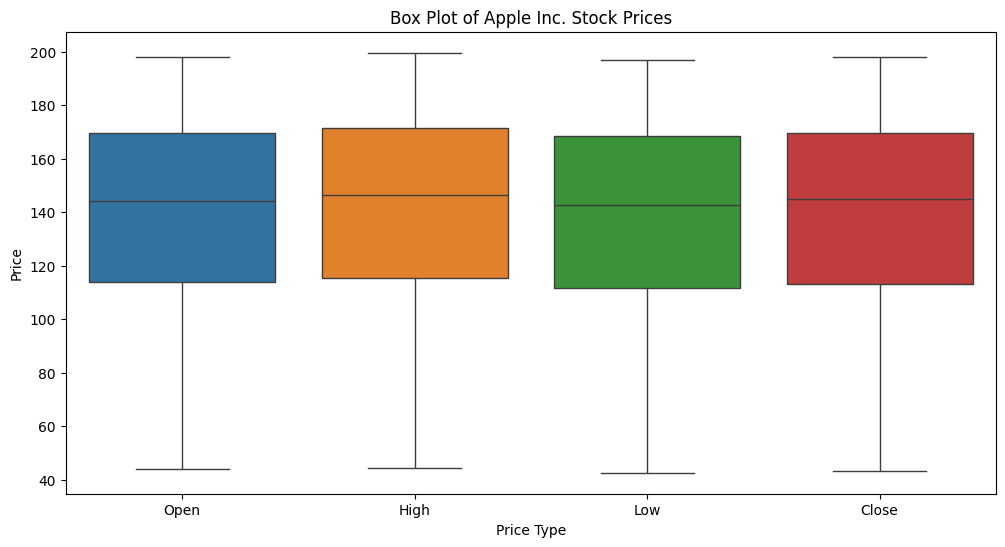

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Apple Inc. Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

**Inference**:

**This plot shows the distribution of the Open, High, Low, and Close prices. The box represents the interquartile range (IQR), and the line inside is the median. The "whiskers" extend to 1.5 times the IQR, and any points beyond the whiskers are considered outliers. This plot helps us quickly see the range and central tendency of the different price types and identify potential extreme values.**

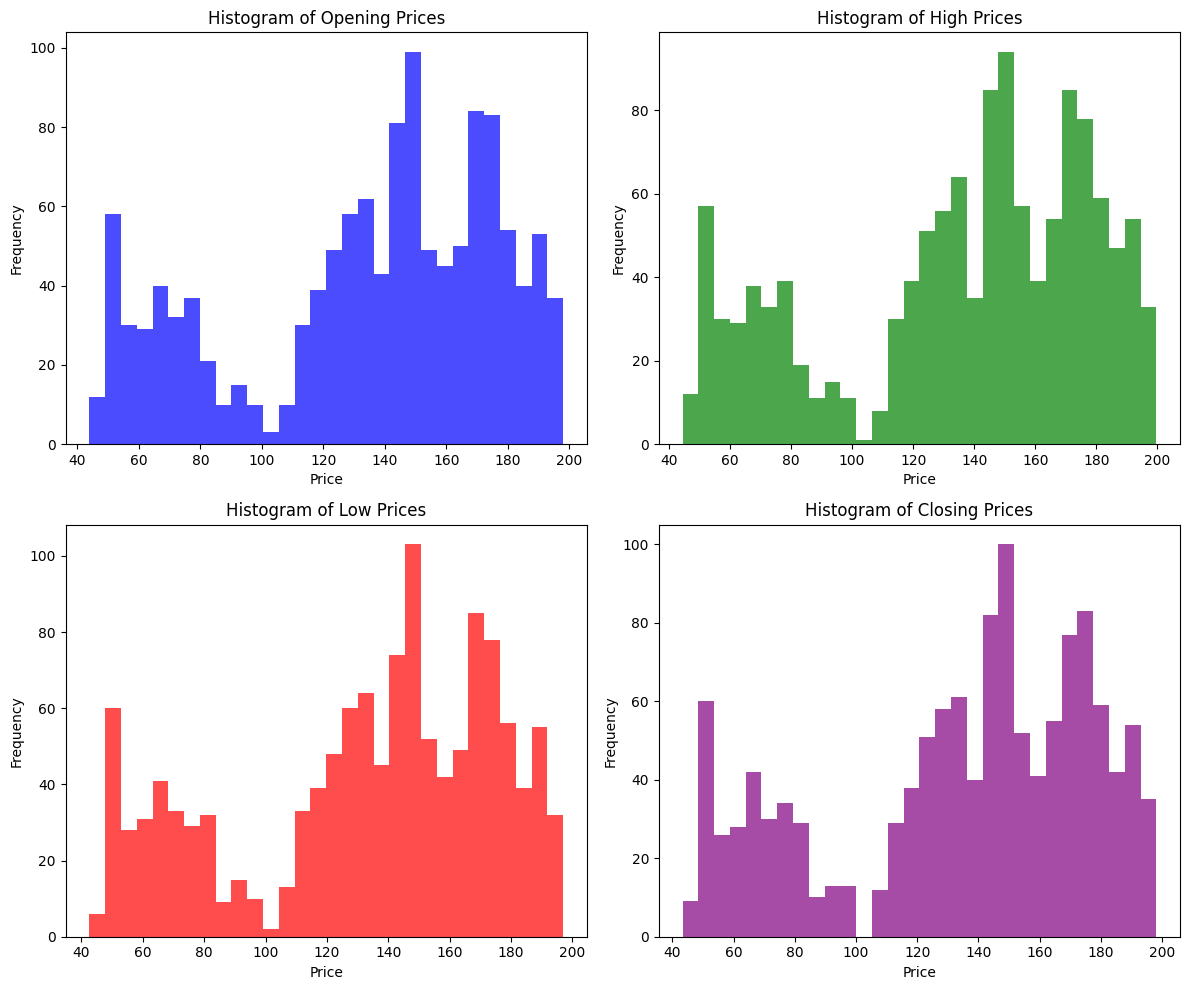

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Open'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Opening Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['High'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of High Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['Low'], bins=30, color='red', alpha=0.7)
plt.title('Histogram of Low Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['Close'], bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Inference**:

**These four histograms show the frequency distribution of each price type. They reveal how often different price ranges occur. For example, you can see if the prices are normally distributed or skewed, and identify common price points.**

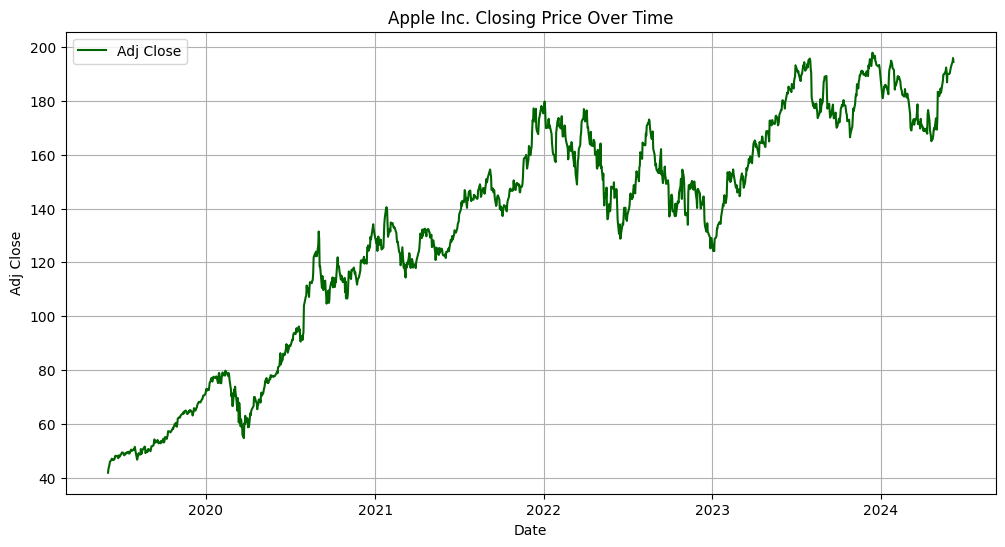

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'],color='DarkGreen',label='Adj Close')
plt.title('Apple Inc. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)
plt.show()

**Inference**:

**This is a time series plot showing the trend of the Adjusted Close price over the specified period. It clearly visualizes how the stock price has changed over time, allowing us to observe upward or downward trends, seasonality, and significant price fluctuations.**

# Feature Selection - Correlation Heatmap

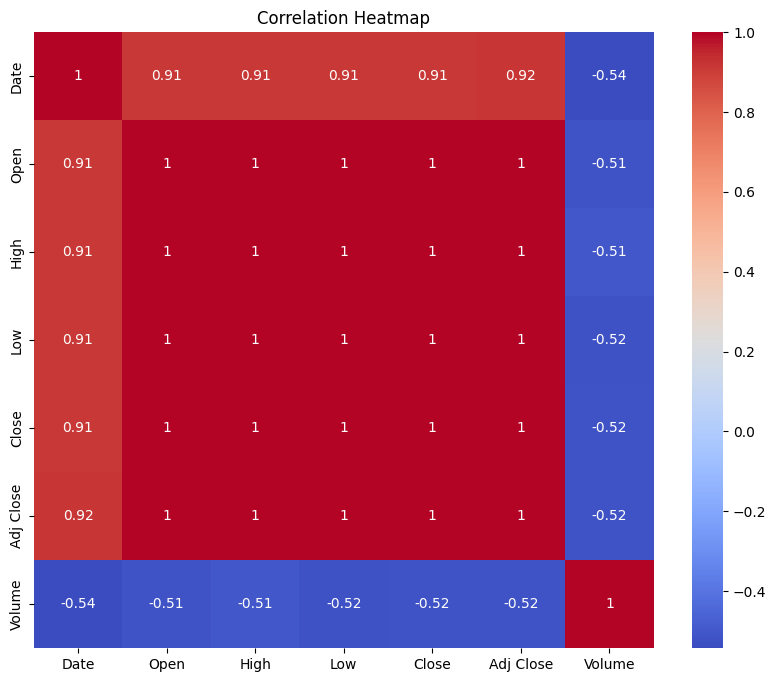

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Inference**:

**This heatmap shows the correlation coefficients between all pairs of numerical features. The color intensity indicates the strength and direction of the correlation. Highly correlated features (like Open, High, Low, Close, and Adj Close) appear with strong colors (red for positive, blue for negative), while weakly correlated features have lighter colors. This helps in understanding the relationships between variables and can inform feature selection for modeling.**

# MODEL BUILDING AND SELECTION

Prepare the data for modeling

Adjust based on available features

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close']
X = df[features]
y = df['Close']

Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building & Selection

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2: {r2}")

Linear Regression - MSE: 0.291702280498297, R2: 0.9998412560247575
Decision Tree Regressor - MSE: 0.4235775909281778, R2: 0.9997694896642813
Random Forest Regressor - MSE: 0.25226942190953544, R2: 0.999862715331544
Support Vector Regressor - MSE: 1257.4315490510176, R2: 0.3157075002952967


# Hyperparameter Tuning for Random Forest Regressor

In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Train and evaluate models

In [ ]:
results = []
for name, model in models.items():
    if name == 'Random Forest Regressor':
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((name, mse, r2, best_model))
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((name, mse, r2, model))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


# Display the results

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R2', 'Trained_Model'])
print(results_df)

                      Model          MSE        R2  \
0         Linear Regression     0.291702  0.999841   
1   Decision Tree Regressor     0.423578  0.999769   
2   Random Forest Regressor     0.259309  0.999859   
3  Support Vector Regressor  1257.431549  0.315708   

                                       Trained_Model  
0                                 LinearRegression()  
1             DecisionTreeRegressor(random_state=42)  
2  (DecisionTreeRegressor(max_features=1.0, rando...  
3                                              SVR()  


# Select the best model based on R2 score

In [ ]:
best_model_row = results_df.loc[results_df['R2'].idxmax()]
best_model_name = best_model_row['Model']
best_model = best_model_row['Trained_Model']
print(f"The best model is: {best_model_name} with R2 score: {best_model_row['R2']}")

The best model is: Random Forest Regressor with R2 score: 0.9998588841638213


# Visualize predictions vs actual values for the best model

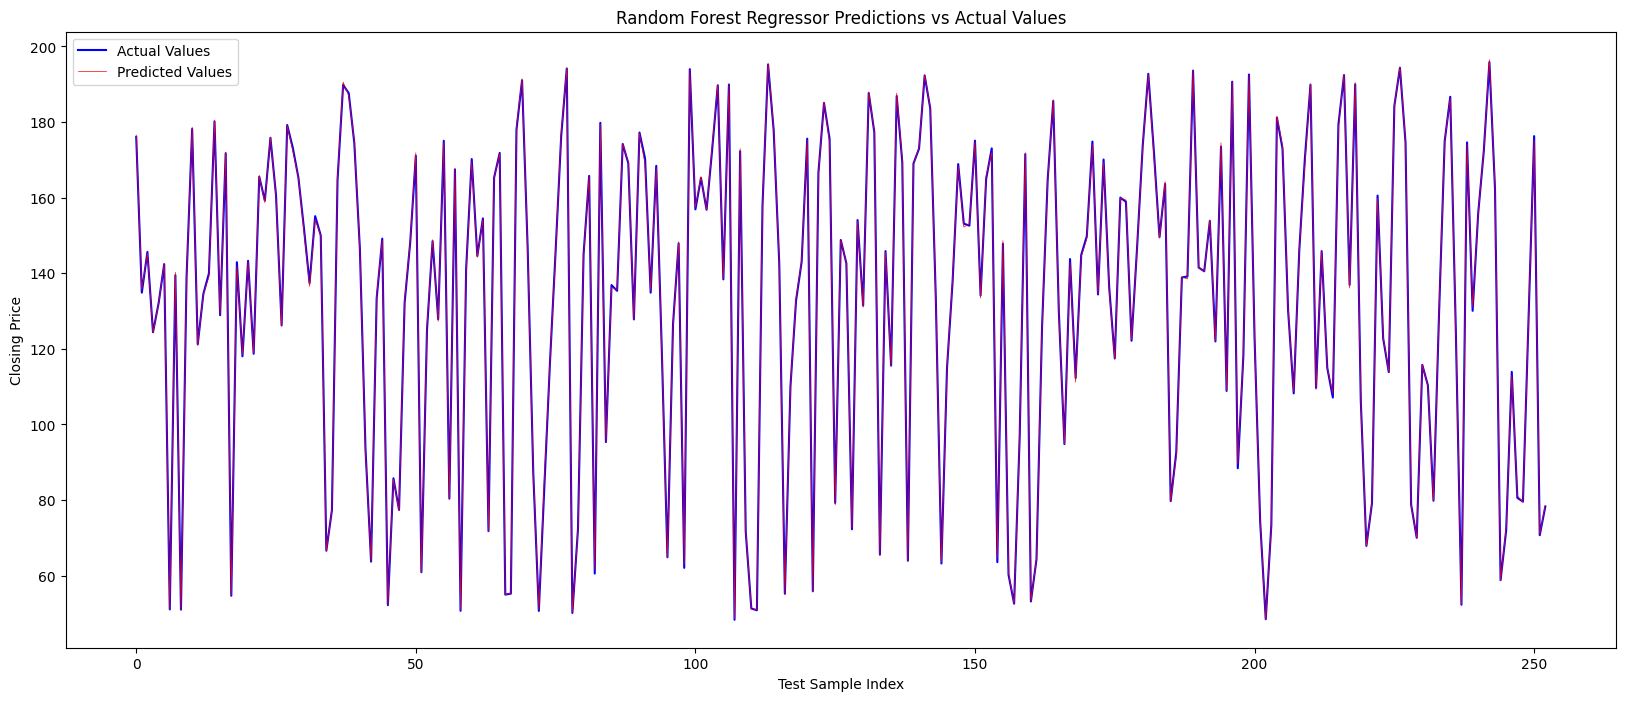

In [ ]:
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label='Actual Values',color='blue', linewidth=1.5)
plt.plot(y_pred_best, label='Predicted Values',color='red', linewidth=0.5)
plt.legend()
plt.title(f'{best_model_name} Predictions vs Actual Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Closing Price')
plt.show()

**Inference**:

**This line plot compares the predicted closing prices from the best model (Random Forest Regressor) against the actual closing prices on the test set. A good model's predicted line will closely follow the actual values, indicating accurate predictions.**

# Model Performance Comparison Plot:


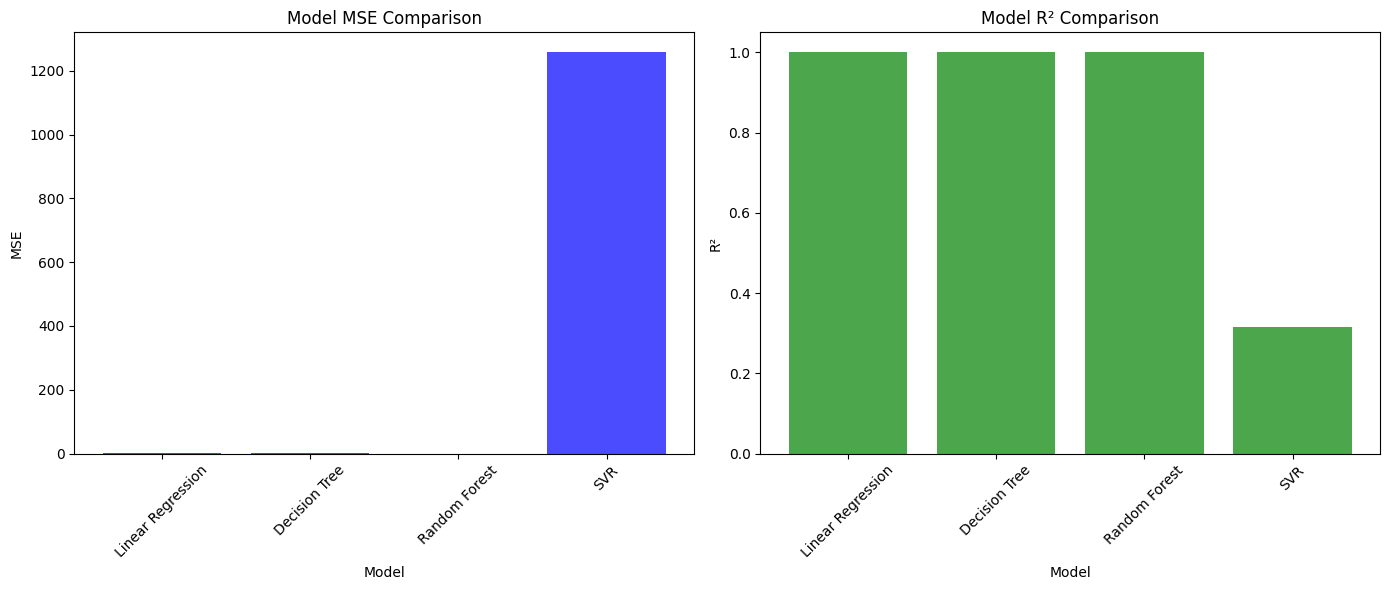

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR'],
    'MSE': [0.291702, 0.423578,  0.259309, 1257.431549],
    'R2': [0.999841, 0.999769, 0.999859, 0.315708]
})

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# MSE plot
ax1.bar(results_df['Model'], results_df['MSE'], color='blue', alpha=0.7)
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE')
ax1.set_title('Model MSE Comparison')
ax1.tick_params(axis='x', rotation=45)

# R2 plot
ax2.bar(results_df['Model'], results_df['R2'], color='green', alpha=0.7)
ax2.set_xlabel('Model')
ax2.set_ylabel('R²')
ax2.set_title('Model R² Comparison')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Inference**:

**These bar plots visually compare the performance of the different models based on Mean Squared Error (MSE) and R-squared (R²) scores. Lower MSE and higher R² values indicate better model performance. These plots make it easy to see which model performed best.**

# Feature Importance Plot (for Random Forest Regressor):

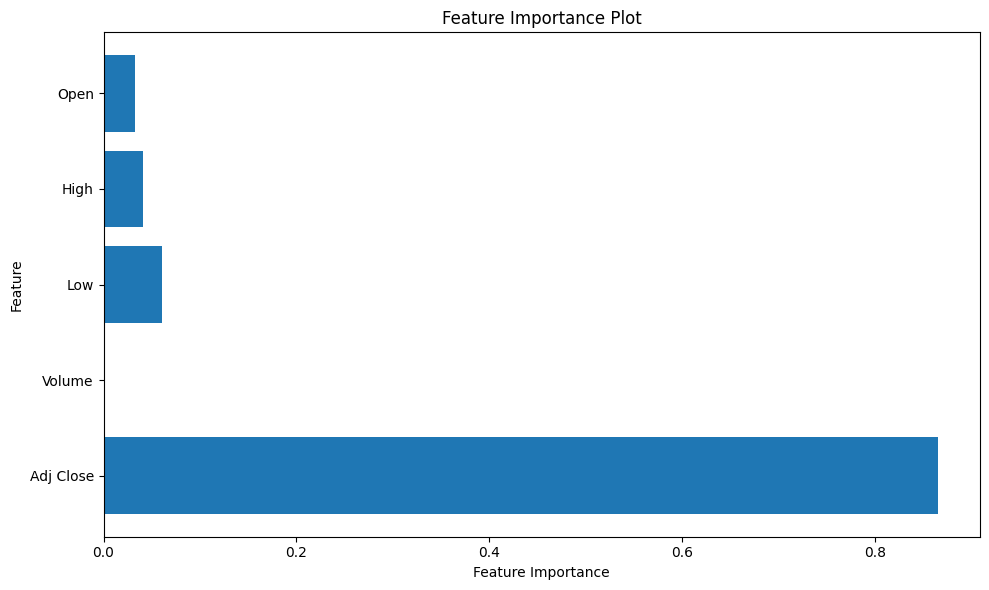

In [ ]:
# Assuming 'best_model' is a trained Random Forest Regressor model
importances = best_model.feature_importances_
feature_names = X.columns

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

**Inference**:

**This bar plot shows the relative importance of each feature in the Random Forest Regressor model's predictions. Features with higher importance scores contribute more to the model's output. This helps in understanding which factors the model considers most influential in predicting the closing price.**

# Residual Plot:

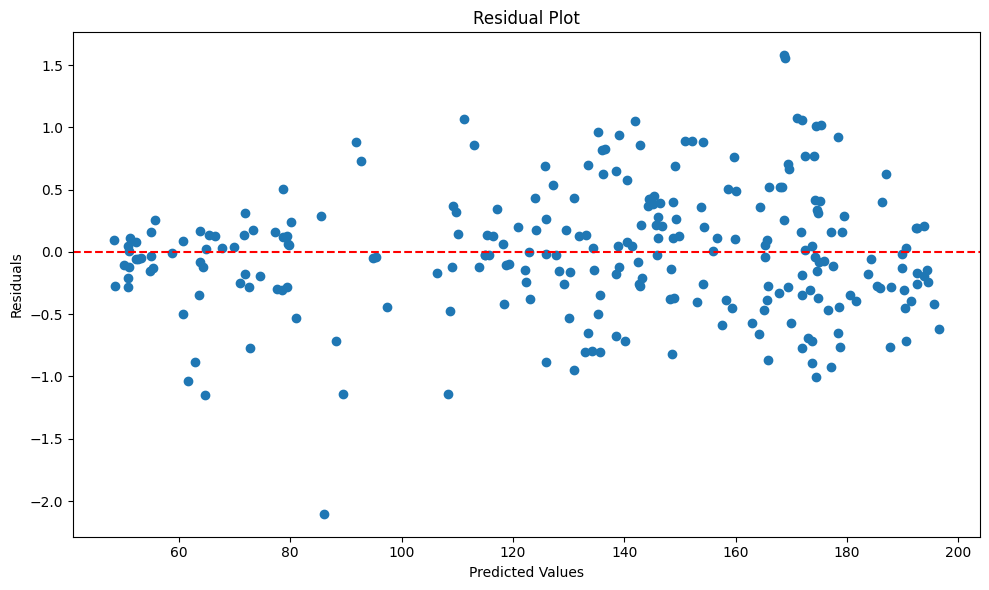

In [ ]:
# Assuming 'y_test' contains actual target values and 'y_pred_best' contains predicted values
residuals = y_test - y_pred_best

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

**Inference**:

**This scatter plot shows the residuals (the difference between actual and predicted values) against the predicted values. For a good model, the residuals should be randomly scattered around zero, with no clear pattern. Patterns in the residual plot can indicate issues with the model.**

# Learning Curve:

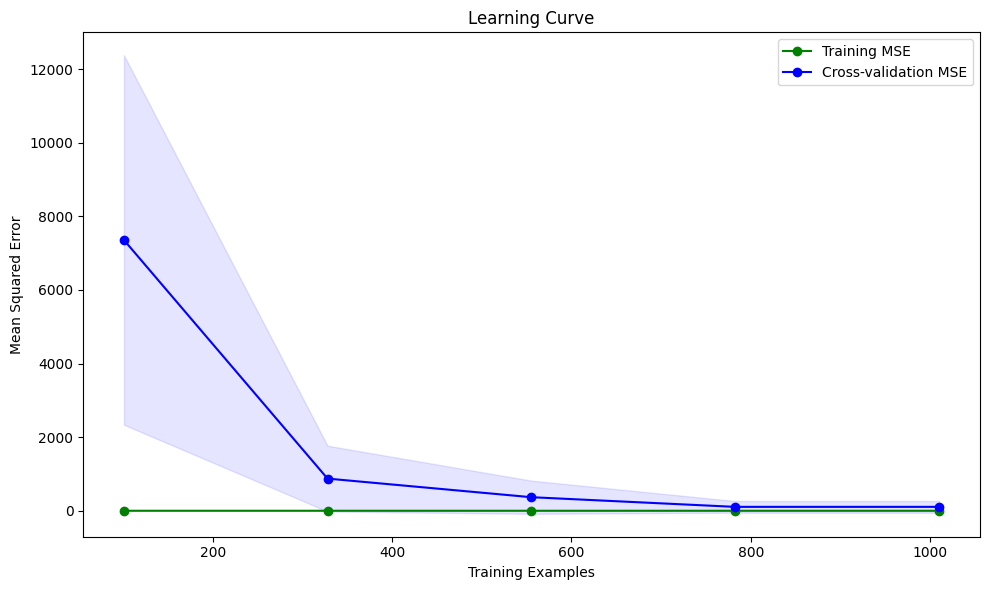

In [ ]:
from sklearn.model_selection import learning_curve

# Assuming 'best_model' is a trained model and 'X' and 'y' contain the dataset
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculating mean and standard deviation of train and test scores
train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)
test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="blue")
plt.plot(train_sizes, train_mean, 'o-', color="green", label="Training MSE")
plt.plot(train_sizes, test_mean, 'o-', color="blue", label="Cross-validation MSE")
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.tight_layout()
plt.show()

**Inference**:

**This plot shows the model's performance (in terms of MSE) on the training and cross-validation sets as the amount of training data increases. It helps assess if the model is overfitting (training error is much lower than cross-validation error) or underfitting (both errors are high).**

# Hyperparameter Tuning Results Plot:

This will depend on the method used for hyperparameter tuning. If GridSearchCV was used, the best approach is to directly inspect the cv_results_ attribute of the GridSearchCV object.

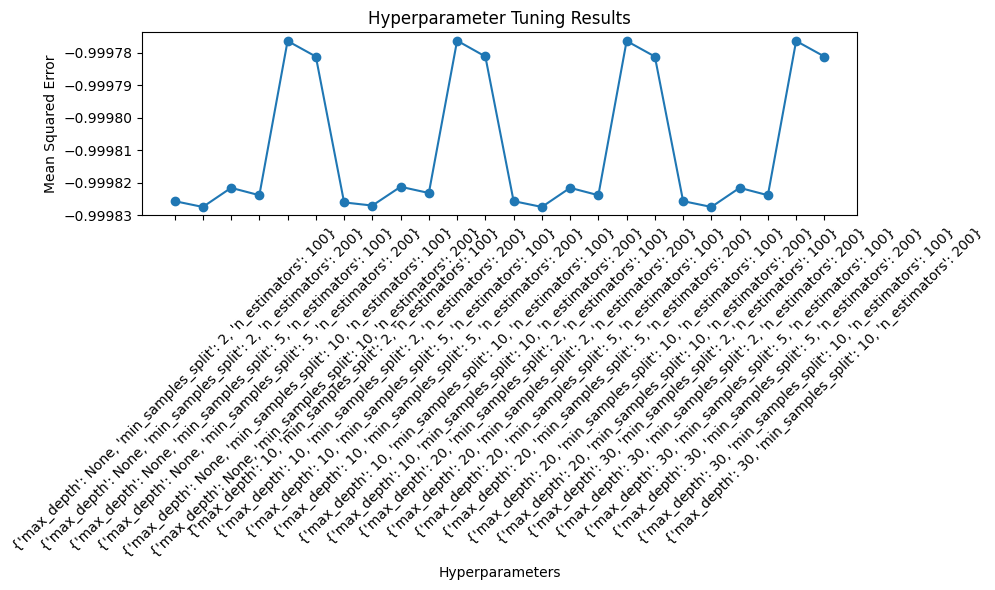

In [ ]:
# Assuming 'grid_search' is a GridSearchCV object
import numpy as np

# Extracting hyperparameter values and corresponding performance metrics
params = grid_search.cv_results_['params']
mean_test_scores = -grid_search.cv_results_['mean_test_score']

# Extracting hyperparameters from params dictionary
param_values = [str(params[i]) for i in range(len(params))]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning Results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Inference**:

**This plot shows how the model's performance (Mean Squared Error) changed with different combinations of hyperparameters during the grid search. It helps visualize the impact of tuning on the model's performance and identify the best hyperparameters.**

#Summary:

### * This notebook analyzes Apple Inc. stock data (2019-2024), covering data loading, exploration, and visualization (box plots, histograms, time series). It then builds and evaluates various regression models (Linear Regression, Decision Tree, Random Forest, SVR) to predict the closing price.
### * The process involves preparing the data by selecting features and splitting it for training and testing. Model performance is assessed using MSE and R2 scores, leading to the selection of the Random Forest Regressor as the best model. Hyperparameter tuning is applied to optimize this model.
### * Finally, visualizations (predictions vs. actual, feature importance, residuals, learning curve, tuning results) are used to analyze the best model's performance and the impact of different features and parameters.
### * This systematic approach of data analysis, modeling, evaluation, and visualization guided the decision-making process in selecting the most effective model for stock price prediction.